In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd

In [11]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
labels = data.pop("Outcome")

# Analysera distribution
labels.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
# Standardisera datasetet. Kan också använda scikit-learn
data = (data-data.mean())/data.std()

In [14]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
print(kmeans.labels_)

[1 0 1 0 2 0 0 0 2 1 1 1 1 2 1 0 2 1 0 2 2 1 1 1 1 1 1 0 1 1 1 2 0 0 1 2 1
 1 0 2 2 1 1 1 1 2 0 0 1 0 0 0 0 1 2 0 2 2 2 2 0 1 0 2 1 0 2 1 0 2 0 2 1 2
 0 0 1 0 0 0 0 0 1 0 1 2 1 0 1 0 0 2 1 1 0 2 0 0 0 2 2 0 0 0 0 2 0 2 0 0 2
 2 0 0 2 1 1 0 0 0 2 0 0 1 0 2 2 0 2 1 2 1 2 1 0 0 0 0 0 2 1 1 0 1 2 0 1 2
 1 0 2 0 1 2 1 2 0 0 0 1 1 1 2 0 0 1 0 0 0 0 1 2 0 2 0 2 1 2 1 1 0 0 0 0 1
 1 2 2 2 2 0 1 1 1 1 2 0 0 2 2 0 0 0 0 1 0 1 1 0 1 0 2 1 2 1 2 2 2 0 1 2 1
 0 1 0 0 0 2 2 2 1 2 0 0 0 1 1 2 1 0 0 0 0 2 2 1 1 2 2 0 1 0 0 0 1 0 0 0 2
 1 2 0 0 1 0 1 0 2 0 0 1 0 0 0 1 2 0 0 1 0 0 1 1 1 1 1 2 2 0 2 0 2 2 2 1 2
 2 2 1 1 0 2 0 1 0 2 1 0 2 2 0 2 0 0 1 0 0 1 2 1 0 0 0 1 0 0 2 1 2 1 1 0 0
 1 0 2 0 1 2 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 2 1 1 2 2 1 1 1 2 0 0 0 0 2
 2 0 0 0 2 1 0 0 1 2 0 0 0 0 0 0 1 1 1 0 2 1 2 0 1 2 0 0 0 2 0 1 2 1 1 2 1
 0 1 2 2 2 2 0 2 2 0 2 0 0 2 0 2 0 2 2 0 2 2 2 0 0 0 0 0 0 1 1 0 1 2 0 0 1
 0 2 0 2 0 0 0 0 2 1 0 1 1 0 2 1 1 0 1 0 1 0 0 2 0 2 2 0 0 1 0 1 2 1 1 1 2
 2 0 0 0 2 2 2 0 1 0 0 0 

In [15]:
# Välja fler kluster
sse = []
for i in range(10):
    kmeans = KMeans(n_clusters = i + 1, random_state = 0).fit(data)
    sse.append(kmeans.inertia_)

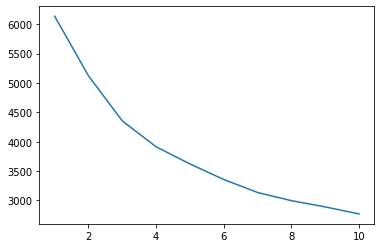

In [16]:
plt.plot(1 + np.arange(len(sse)), sse)

In [17]:
#Få ut klustercenter
print(kmeans.cluster_centers_) # Alla 10 olika kmeans är sparad(!)

[[-1.25831616e-01  1.22638477e+00  6.25301086e-02  7.46661713e-01
   2.92391510e+00  4.45870767e-01 -1.01608422e-01 -8.76138448e-02]
 [-7.95882074e-01 -2.37979164e-01  2.12278255e-01  1.09026303e+00
   1.92727816e-01  1.02327016e+00 -7.83449878e-02 -6.28724580e-01]
 [-4.79075665e-01  4.48391117e-01  2.28425498e-04  2.37097004e-01
   5.36391519e-01 -1.88755994e-01  3.44685046e-02 -4.76480651e-01]
 [-8.86343409e-02 -4.28103212e-02  3.05068163e-01 -1.27186302e+00
  -6.85461749e-01  4.27843636e-02 -2.48701973e-01 -2.26489234e-01]
 [-5.21375898e-01  4.24615116e-01  1.49543299e-01  6.46711518e-01
   5.28499548e-01  3.63171741e-01  2.93126506e+00 -1.05515390e-01]
 [ 9.62683382e-01  3.89392984e-01  4.54935425e-01 -1.13065524e+00
  -6.39218912e-01 -2.67670344e-01 -3.04594134e-01  1.57529052e+00]
 [-5.61411166e-01 -8.44718578e-01 -2.20027098e-01 -1.12614959e-01
  -3.56745789e-01 -7.18898555e-01 -3.15365583e-01 -7.46659229e-01]
 [ 1.27624361e+00  1.22309248e+00  5.38432931e-01  7.32294644e-01
   

In [27]:
#Silhouette score: (b_i - a_i)/max(a_i,b_i)  där a_i är mean distance från alla datapunkter i samma 
silhouette_scores = []
for i in range(10):
    kmeans = KMeans(n_clusters = i + 2, random_state = 0).fit(data)
    predicted_labels = kmeans.labels_
    # print(predicted_labels)
    silhouette_scores.append(metrics.silhouette_score(data, predicted_labels))

print(silhouette_scores)

[0.19565409011385446, 0.17846436745293395, 0.20039690719846015, 0.15291607045244326, 0.16760637284099414, 0.16943027723025014, 0.1672108752194709, 0.1627361019710786, 0.1481884482722491, 0.15264342768492942]
